In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tf.reset_default_graph()

%matplotlib inline
sess = tf.InteractiveSession()

In [18]:
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2016-12-02 11:41:57--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: 'iris.data'

iris.data           100%[=====================>]   4.44K  --.-KB/s   in 0s     

2016-12-02 11:41:58 (94.4 MB/s) - 'iris.data' saved [4551/4551]



In [19]:
D = 3
C = 3
n_samples = 20

train_X = np.random.uniform(low=0, high=1, size=(n_samples, D))
train_Y = np.random.choice([0,1,2], size=(n_samples,1))

train_Y
train_X[:10, :]

array([[ 0.49361515,  0.84896904,  0.77732914],
       [ 0.71432765,  0.84064609,  0.88124988],
       [ 0.40656273,  0.18140192,  0.77720301],
       [ 0.61941587,  0.62690732,  0.33930245],
       [ 0.35189826,  0.77599836,  0.21989444],
       [ 0.70819756,  0.48117524,  0.81691833],
       [ 0.14806668,  0.01072016,  0.91816271],
       [ 0.86776951,  0.50700786,  0.51041501],
       [ 0.40085747,  0.75255207,  0.06677052],
       [ 0.11104268,  0.388782  ,  0.60232669]])

In [20]:
train_Y[:5]

array([[0],
       [0],
       [2],
       [2],
       [1]])

In [21]:
# number of input features + 1 constant term
X = tf.placeholder("float", shape = [None, D], name= "X")
Y = tf.placeholder("int32", shape = [None], name = "Y")

W = tf.Variable(tf.random_normal(shape=(D, C)))
sess.run(W.initializer)

scores = tf.matmul(X, W)

# Mean squared error
probabilites = tf.nn.softmax(scores)

In [22]:
probabilites

<tf.Tensor 'Softmax_1:0' shape=(?, 3) dtype=float32>

In [23]:
sess.run(probabilites, feed_dict={X: train_X})

array([[ 0.32040048,  0.35170019,  0.32789934],
       [ 0.33798066,  0.35711661,  0.30490264],
       [ 0.39574265,  0.25489682,  0.3493605 ],
       [ 0.3057296 ,  0.43250039,  0.26176995],
       [ 0.27185485,  0.44524518,  0.28290001],
       [ 0.37628233,  0.31942514,  0.30429259],
       [ 0.40720093,  0.18929537,  0.40350363],
       [ 0.34374565,  0.40807787,  0.24817643],
       [ 0.25916651,  0.4840624 ,  0.25677112],
       [ 0.34271282,  0.27852061,  0.3787666 ],
       [ 0.36702275,  0.38296926,  0.25000799],
       [ 0.30663255,  0.31266662,  0.3807008 ],
       [ 0.32715508,  0.30206785,  0.3707771 ],
       [ 0.41756135,  0.29464519,  0.28779346],
       [ 0.22948129,  0.47844538,  0.29207328],
       [ 0.35852402,  0.23727727,  0.40419874],
       [ 0.34597892,  0.39480054,  0.25922057],
       [ 0.38289869,  0.31334698,  0.30375433],
       [ 0.2838017 ,  0.47192523,  0.24427302],
       [ 0.24834383,  0.4991737 ,  0.25248241]], dtype=float32)

In [24]:
costs = tf.nn.sparse_softmax_cross_entropy_with_logits(
logits = probabilites,
    labels=Y
)
costs

<tf.Tensor 'SparseSoftmaxCrossEntropyWithLogits_1/SparseSoftmaxCrossEntropyWithLogits:0' shape=(?,) dtype=float32>

In [25]:
sess.run(costs, feed_dict={X: train_X[:5, :], Y: train_Y[:5, 0]})

array([ 1.11163437,  1.09419703,  1.08428872,  1.17282605,  0.98989689], dtype=float32)

In [26]:
sess.run(tf.reduce_mean(costs), feed_dict={X: train_X[:5, :], Y: train_Y[:5, 0]})

1.0905687

In [33]:
D = 3
X = tf.placeholder("float", shape = [None, D])
Y = tf.placeholder("float", shape = [None, 1])

W = tf.Variable(tf.zeros(shape=(D, 1)))
sess.run(W.initializer)

logits = tf.matmul(X, W)
probabilities = tf.sigmoid(logits)
logistic_loss = -tf.reduce_mean(Y * tf.log(probabilities) + (1 - Y) * tf.log(1 - probabilities))

# Parameters
learning_rate = .18
n_epochs = 100
display_step = 10

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(logistic_loss)
init = tf.initialize_all_variables()

fitted_ws = np.zeros((n_epochs, D))

for epoch in range(n_epochs):

    _, fitted_w, loss_value, predicted_probs = sess.run(
        fetches=[optimizer, W, logistic_loss, probabilities],
        feed_dict={X: train_X, Y: train_Y})
    #fitted_ws[epoch, :] = fitted_w.ravel()
    if (epoch) % display_step == 0:
        print("Epoch: {:4d}, cost={:.4f} W={}".format(epoch, loss_value, fitted_w.ravel()))

Epoch:    0, cost=0.6931 W=[ 0.05677099  0.06550214  0.06990841]
Epoch:   10, cost=0.2109 W=[ 0.50919861  0.5927816   0.64077812]
Epoch:   20, cost=-0.0332 W=[ 0.82724822  0.96905297  1.06027532]
Epoch:   30, cost=-0.1860 W=[ 1.0770396   1.26624274  1.40077007]
Epoch:   40, cost=-0.2970 W=[ 1.28894889  1.51812315  1.6961664 ]
Epoch:   50, cost=-0.3856 W=[ 1.47782433  1.74163795  1.96343935]
Epoch:   60, cost=-0.4608 W=[ 1.6517092   1.94619989  2.21200728]
Epoch:   70, cost=-0.5273 W=[ 1.81534553  2.13749266  2.44754958]
Epoch:   80, cost=-0.5881 W=[ 1.97171688  2.31917167  2.67371464]
Epoch:   90, cost=-0.6446 W=[ 2.12279582  2.49370432  2.89295959]


('n_correct_samples / n_samples =', 60, 20)


/opt/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


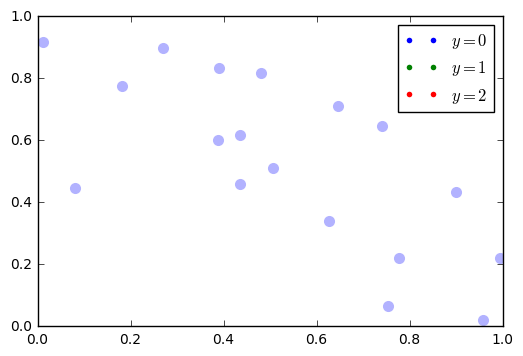

In [34]:


def plot_result(predicted_classes=None):

    if predicted_classes is None:
        plt.plot(train_X[:, 1], train_X[:, 2], 'o', ms=8, alpha=.3, color='grey');
    else:
        for c in range(C):
            mask = predicted_classes == c
            plt.plot(train_X[mask, 1], train_X[mask, 2], 'o', ms=8, alpha=.3, mec='none')
    plt.gca().set_prop_cycle(None)
    for c in range(C):
        mask = c in [0,1,2]    
        plt.plot(train_X[mask, 1], train_X[mask, 2], 'o', ms=4, mec='none', label='$y = {}$'.format(c));
    plt.legend()

predicted_probs = sess.run(probabilities, feed_dict={X: train_X})
predicted_classes = predicted_probs.argmax(axis=1)
# classify everyone to the same class :/
n_correct_samples = np.sum(predicted_classes == train_Y)
print('n_correct_samples / n_samples =', n_correct_samples, n_samples)

plot_result(predicted_classes)